In [32]:
#Importing libraries

#for data manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for ignore warning
import warnings
warnings.filterwarnings("ignore")

In [33]:
# read in reservation data
reservation = pd.read_csv("reservation.csv")
print(reservation.head(3))

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ... deposit_type agent  \
0                        0                     0   BB  ...   No Deposit   NaN   
1                        0                     0   BB  ...   No Deposit   NaN   
2                        0                     1   BB  ...   No Deposit   NaN   

  company  days_in_waiting_list  customer_type   adr  \
0     NaN                     0      Transient   0.0   
1    

In [34]:
#read in client information data
client = pd.read_csv("client_info.csv")
print(client.head(3))

  reservation_status_date            name  babies  children  adults  \
0                7/1/2015   Ernest Barnes       0       0.0       2   
1                7/1/2015    Andrea Baker       0       0.0       2   
2                7/2/2015  Rebecca Parker       0       0.0       1   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  


In [35]:
# merged two dataset into a new dataset.
df = pd.concat([reservation, client], axis = 1)
print(df.head(3))

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ... reservation_status  \
0                        0                     0   BB  ...          Check-Out   
1                        0                     0   BB  ...          Check-Out   
2                        0                     1   BB  ...          Check-Out   

  Unnamed: 28 reservation_status_date            name  babies  children  \
0         NaN                7/1/2015   Er

# data analysis and data cleaning

In [36]:
#check size of dataset
print(df.shape)

(119390, 37)


there are 37 columns and 119390 rows in this dataset.

In [37]:
#dataset information
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Unnamed: 28,babies,children,adults
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,0.0,119390.000000,119386.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,0.031912,0.087118,0.137097,...,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,NaN,0.007949,0.103890,1.856403
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.175767,0.844336,1.497437,...,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN,0.097436,0.398561,0.579261
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,NaN,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,NaN,0.000000,0.000000,2.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,NaN,0.000000,0.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,1.000000,26.000000,72.000000,...,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,NaN,10.000000,10.000000,55.000000


In [38]:
# columns in dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'Unnamed: 28', 'reservation_status_date', 'name',
       'babies', 'children', 'adults', 'email', 'phone-number', 'credit_card'],
      dtype='object')

In [39]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  country                         118902 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

In [40]:
#remove the unnecessary columns
df.drop(["Unnamed: 28","phone-number","credit_card","agent","company","email","name"],axis=1, inplace=True)
print(df.head(3))

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ...  \
0                        0                     0   BB  ...   
1                        0                     0   BB  ...   
2                        0                     1   BB  ...   

  days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                    0     Transient   0.0                            0   
1                    0     Transient   0.0 

In [41]:
#changing "reservation_status_date" from object to date time
df["reservation_status_date"]= pd.to_datetime(df["reservation_status_date"])
print(df["reservation_status_date"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: reservation_status_date
Non-Null Count   Dtype         
--------------   -----         
119390 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 932.9 KB
None


In [42]:
#missing values
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
reservation_

In [43]:
#remove null values
df.dropna(inplace=True)

In [44]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,babies,children,adults
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984,0.007948,0.104207,1.858391
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00,0.000000,0.000000,2.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00,0.000000,0.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,10.000000,10.000000,55.000000
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN,0.097380,0.399172,0.578576


In [45]:
#  total children 
df['children'].sum()

12390.0

In [46]:
#  total adults
df['adults'].sum()

220959

In [47]:
#  total babies
df['babies'].sum()

945

# Data Analysis and Visualizations

In [48]:
#check the new or repeated guest
value_counts = df["is_repeated_guest"].value_counts()
print(value_counts)

is_repeated_guest
0    115092
1      3806
Name: count, dtype: int64


In [49]:
#  replace 0 with "New" and 1 with "Repeated"
df["is_repeated_guest"] = df["is_repeated_guest"].replace({0: "New", 1: "Repeated"})
print(value_counts)

is_repeated_guest
0    115092
1      3806
Name: count, dtype: int64


is_repeated_guest
New         96.798937
Repeated     3.201063
Name: proportion, dtype: float64


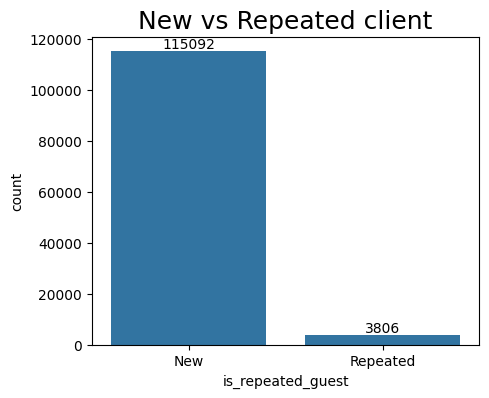

In [50]:
# calculating percentage of repeated guest
repeated_guest = df["is_repeated_guest"].value_counts(normalize = True)*100
print(repeated_guest)

#creating a countplot and label the bars in the plot using the Seaborn library
plt.figure(figsize = (5,4))

#bar title
plt.title("New vs Repeated client", size = 18)

# count plot using Seaborn with x axis label
ax=sns.countplot(data=df,x="is_repeated_guest")

#label the bar
ax.bar_label(ax.containers[0])
plt.show()

An analysis of the chart, majority of clients are new clients (approximately 96.80%), while a small proportion are repeated clients (approximately 3.20%). 

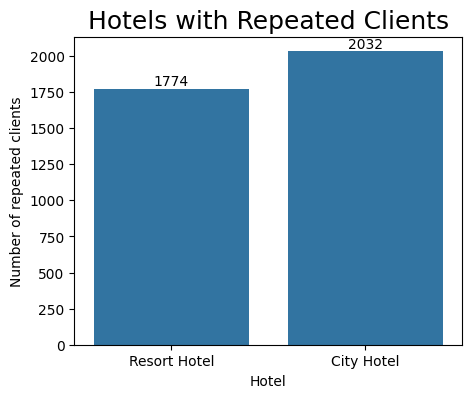

In [51]:
# which hotel has more reapeted client
plt.figure(figsize = (5,4))

# Filter the data to include only repeated clients
repeated_clients = df[df['is_repeated_guest'] == "Repeated"]

# Count the number of repeated clients for each hotel
hotel_counts = repeated_clients['hotel'].value_counts()

ax= sns.countplot(x="hotel", data = repeated_clients)

plt.title("Hotels with Repeated Clients",size = 18)
plt.xlabel("Hotel")
plt.ylabel("Number of repeated clients")


#label the bar with counts
ax.bar_label(ax.containers[0])
plt.show()

The chart above shows City hotel do better job of making guest to come back and stay with them compare to resort hotel.

{'Previous Cancellation': 10361, 'Not Canceled': 15651}


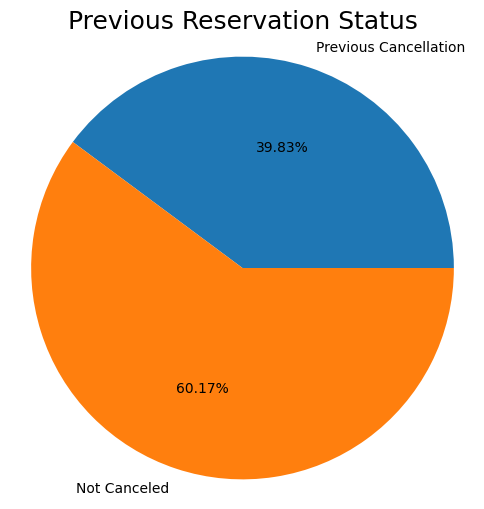

In [52]:
#previous cancellations vs previous bookings not canceled
data={
    "Previous Cancellation" : df["previous_cancellations"].sum(),
    "Not Canceled" : df["previous_bookings_not_canceled"].sum()
}
print(data)

#label for pie chart
label = data.keys() 


#create a pie chart
plt.figure(figsize=(6, 6))

#title for the pie chart
plt.title("Previous Reservation Status", size=18)

plt.pie(data.values(), labels=label, autopct="%1.2f%%")# autopct display the percentage labels in chart

plt.axis('equal')  # Equal ratio ensures that the pie chart is circular

plt.show()

The pie chart shows that the majority of previous bookings (60.17%), were not canceled, while 39.83% of previous bookings were canceled.

is_canceled
0    62.864808
1    37.135192
Name: proportion, dtype: float64


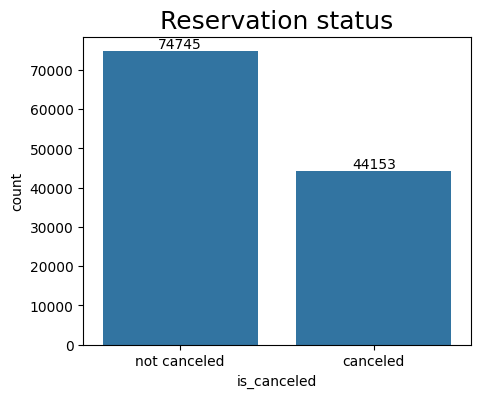

In [53]:
#calculating percentage of reservation cancelation
cancelled_percentage = df["is_canceled"].value_counts(normalize = True)*100
print(cancelled_percentage)

# Replace 0 with "not canceled" and 1 with "canceled" in the 'is_canceled' column
df['is_canceled'] = df['is_canceled'].replace({0: 'not canceled', 1: 'canceled'})

#creating a countplot and label the bars in the plot using the Seaborn library
plt.figure(figsize = (5,4))
plt.title("Reservation status", size=18)

# count plot using Seaborn with x axis label
ax=sns.countplot(data=df,x="is_canceled")

#label the bar
ax.bar_label(ax.containers[0])


plt.show()



The chart above indicates that 74745(62.86%) booking is not cancelled while the 44153(37.14%) booking is cancelled.

When comparing the reservation status chart with the previous reservation status one, the percentage of previous cancellations has decreased. In the previous period, the cancellation rate was 39.83%, whereas the current rate stands at 37.14%. This reflects a positive improvement.

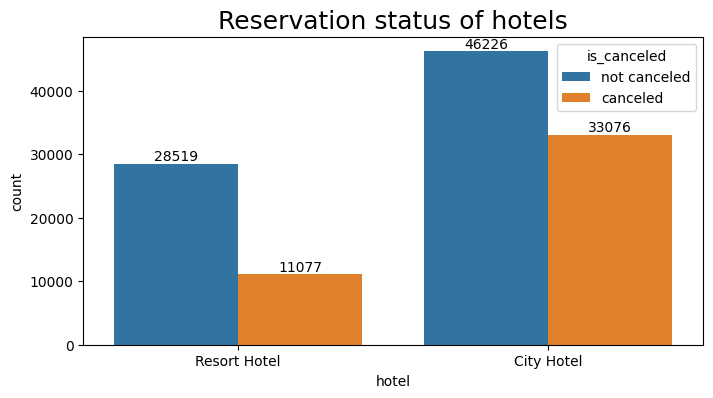

In [54]:
#which hotel has more cancellation.
plt.figure(figsize= (8,4))
plt.title("Reservation status of hotels", size=18)

ax= sns.countplot(data=df,x="hotel",hue= "is_canceled")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

The cancellation rate of "City Hotel" is higher compared to the "Resort Hotel".

In [55]:
#percentage of reservation status of resort hotel 

resort = df[df["hotel"] == "Resort Hotel"]
resort["is_canceled"].value_counts(normalize=True)*100



is_canceled
not canceled    72.024952
canceled        27.975048
Name: proportion, dtype: float64

72.03 percent reservation of resort hotel is not cancelled and 27.97 reservation is canceled.

In [56]:
#percentage of reservation status of city hotel
city = df[df["hotel"] == "City Hotel"]
city["is_canceled"].value_counts(normalize=True)*100

is_canceled
not canceled    58.29109
canceled        41.70891
Name: proportion, dtype: float64

58.29 percent reservation of city hotel is not canceled and 41.71 reservation is canceled.

In [57]:
#Assessing whether the price is influencing cancellations for bookings at both the resort and city hotels

In [58]:
#grouping data by the "reservation_status_date" and calculation the mean of average daily rate(adr)
resort= resort.groupby("reservation_status_date")['adr'].mean().reset_index()
city= city.groupby("reservation_status_date")['adr'].mean().reset_index()

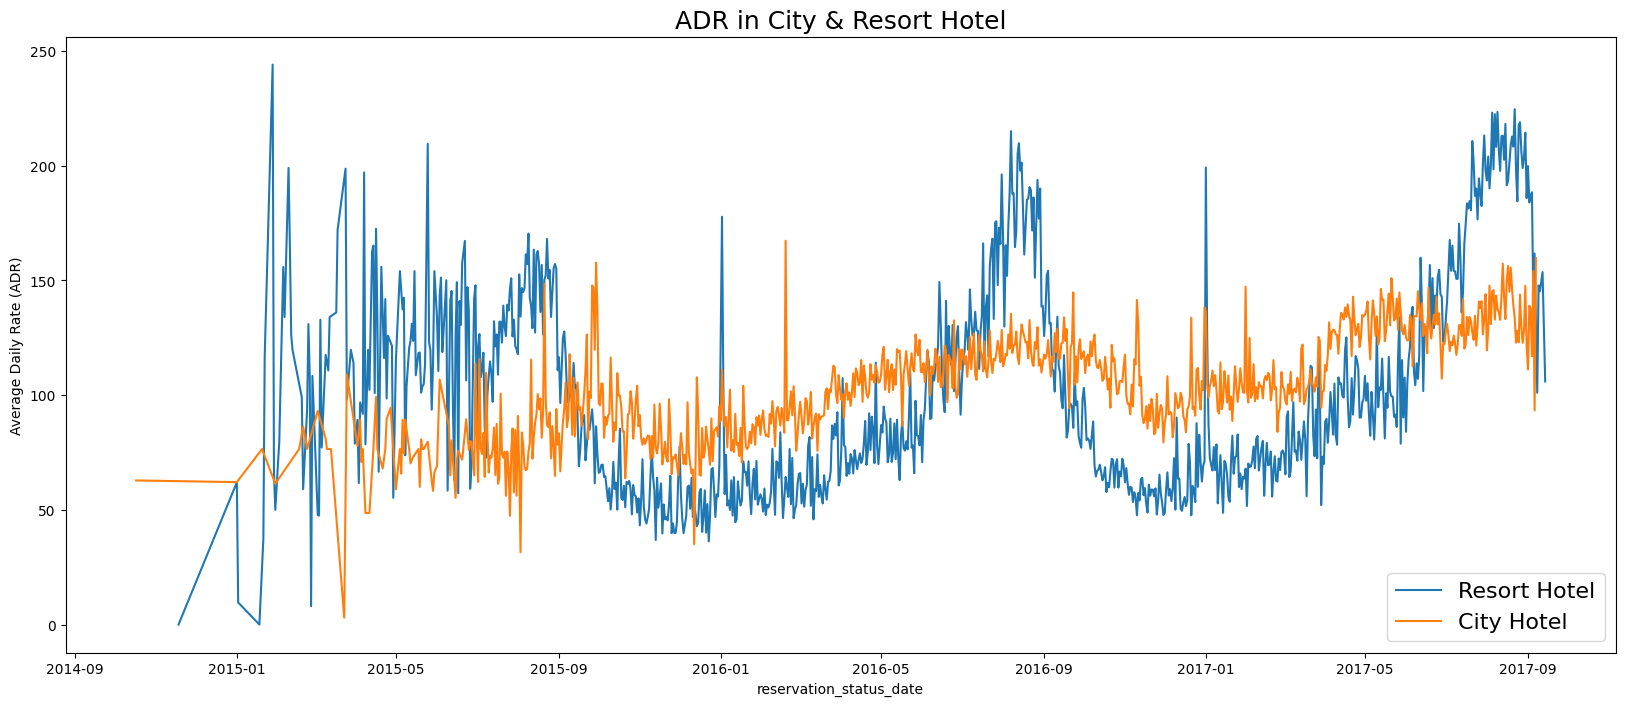

In [59]:
#creating visulization of the adr in resort and city hotel using seaborns lineplot function
plt.figure(figsize = (20,8))

plt.title("ADR in City & Resort Hotel", fontsize = 18)

#plotting the adr for the resort hotel
sns.lineplot(data=resort,x= "reservation_status_date", y="adr", label= "Resort Hotel")

#plotting the adr for the city hotel
sns.lineplot(data=city,x= "reservation_status_date", y="adr", label= "City Hotel")


plt.ylabel('Average Daily Rate (ADR)')
plt.legend(fontsize=16)
           
plt.show()

Average daily rate in resort hotel is higher than city hotel in some periods.
high price might be cause for cancellation for resort hotel.

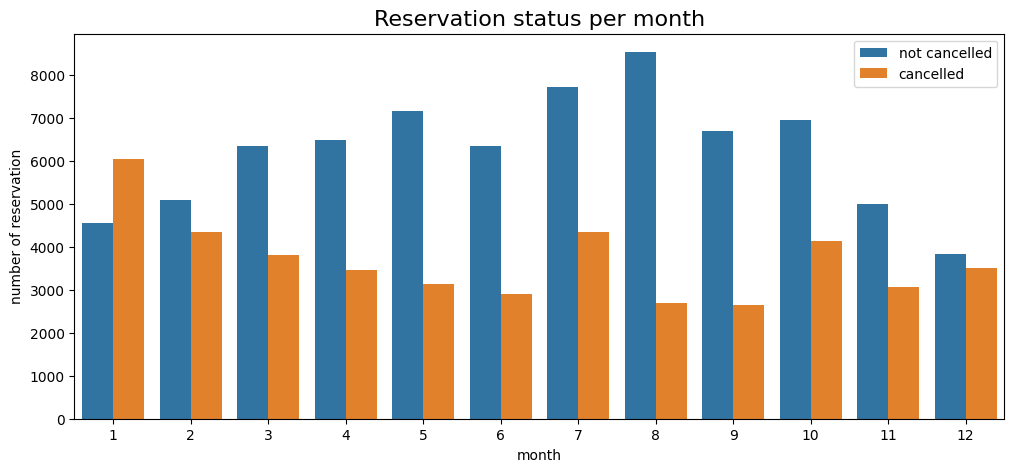

In [60]:
# Finding the resarvation and cancellation of each month
# creating the month column in dataframe by taking the month from reservation_status_date
df["month"] = df["reservation_status_date"].dt.month

plt.figure(figsize = (12,5))
hue_order = ["not canceled", "canceled"]

# using seaborns countplot function
sns.countplot(data = df, x= "month", hue = "is_canceled", hue_order=hue_order)

plt.title("Reservation status per month", fontsize = 16)
plt.ylabel("number of reservation")
plt.legend(["not cancelled", "cancelled"])
plt.show()

Blue bars are showing not canceled reservation and orange bar is showing cancelled reservation.
In January(1 month), hotel experienced its highest number of cancellation and August/september(8 and 9 month) experienced the lowest number of cancellation.
August also recorded highest reservation and December recorded the lowest reservation.

Now, finding whether changes in price is contributing to a higher rate of reservation cancellations

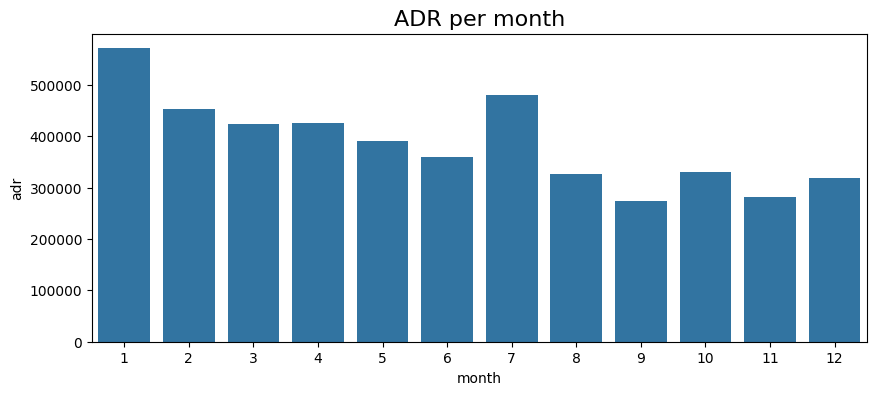

In [61]:
#Average Daily Rate (ADR) for canceled reservations on a monthly basis
plt.figure(figsize=(10,4))
plt.title("ADR per month", fontsize = 16)

canceled_data=df[df["is_canceled"]== "canceled"] #Selecting only canceled reservations

sns.barplot(x="month", y="adr", data=canceled_data.groupby("month")["adr"].sum().reset_index())

plt.show()

The chart above indicates that January (1 month) has the highest Average Daily Rate (ADR), while the month of September (9 month) has the lowest ADR. Upon comparing the ADR per month chart with the Reservation Status per month chart, January with its higher ADR, also experiences higher cancellation ratesSeptember, with its lower ADR, shows lower cancellation rates.
So, it seems like the price is affecting the likelihood of cancellations – higher prices might be leading to more cancellations.

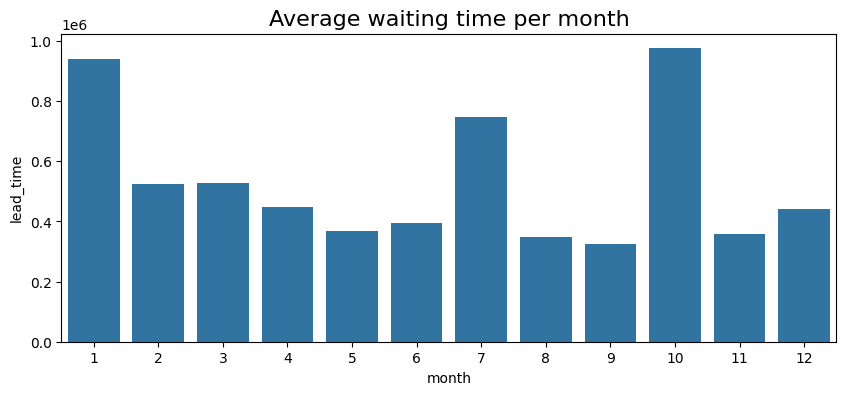

In [62]:
plt.figure(figsize=(10,4))
plt.title("Average waiting time per month", fontsize = 16)

canceled_data=df[df["is_canceled"]== "canceled"] #Selecting only canceled reservations

sns.barplot(x="month", y="lead_time", data=canceled_data.groupby("month")["lead_time"].sum().reset_index())

plt.show()

The chart above indicates that January (1 month) has the highest lead time while the month of September (9 month) has the lowest lead time.comparing the average waiting time per month with the Reservation Status per month chart, January with its higher lead time, also experiences higher cancellation rates September, with its lower lead time, shows lower cancellation rates.
So, it seems like the waiting time is affecting the likelihood of cancellations – higher waiting time leading to more cancellations.

# suggestions


Based on the analysis of hotel reservation data, a few key suggestions for improvement emerge. Consider implementing a dynamic pricing strategy to adjust room rates based on demand, especially during peak months. Launch targeted promotional campaigns, run special deals on social media, to attract more guests with special offers and discounts. Optimize lead times by encouraging shorter waiting periods through promotions and flexible booking policies. Prioritize ongoing data analysis to monitor the impact of implemented strategies and make adjustments accordingly. Collect feedback from guests who cancel reservations to gain insights into improvement areas. Additionally, explore competitor pricing strategies, invest in employee training for enhanced customer interactions, and consider introducing seasonal package offers to increase reservations and reduce cancellations. 